In [1]:
import glob
import matplotlib.pyplot as plt
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation

In [2]:
# Modify the list of words to be searched for
words = ['war', 'love', 'death', 'life', 'marry', 'fight', 'king', 'queen']

Lexical Dispersion Plot for books/Marlowe-corpus/3HVI-MIT (CL).txt


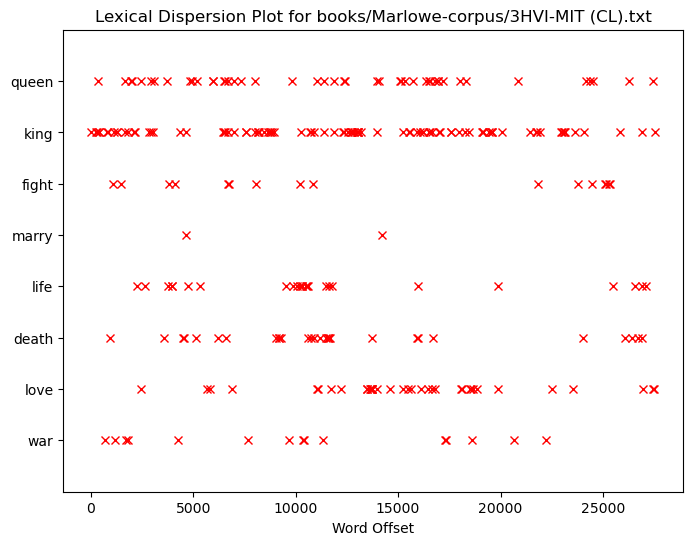

Lexical Dispersion Plot for books/Marlowe-corpus/EMED-DrFaust-reg-3 (CL).txt


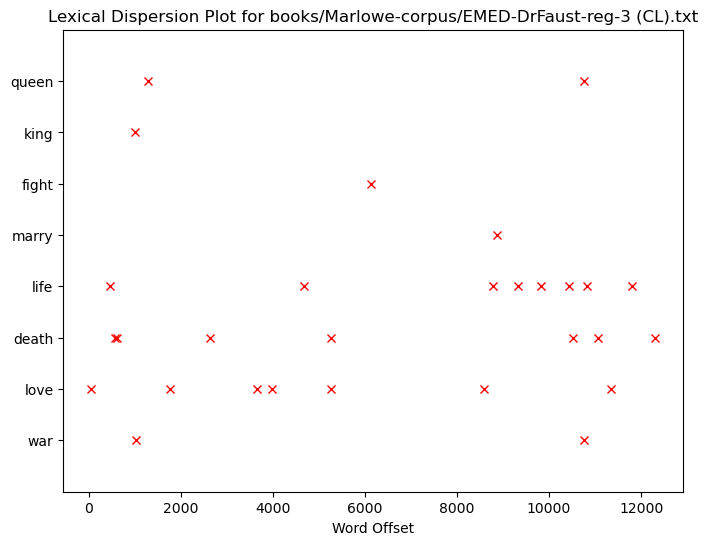

Lexical Dispersion Plot for books/Marlowe-corpus/EMED-2Tam-reg-3 (CL).txt


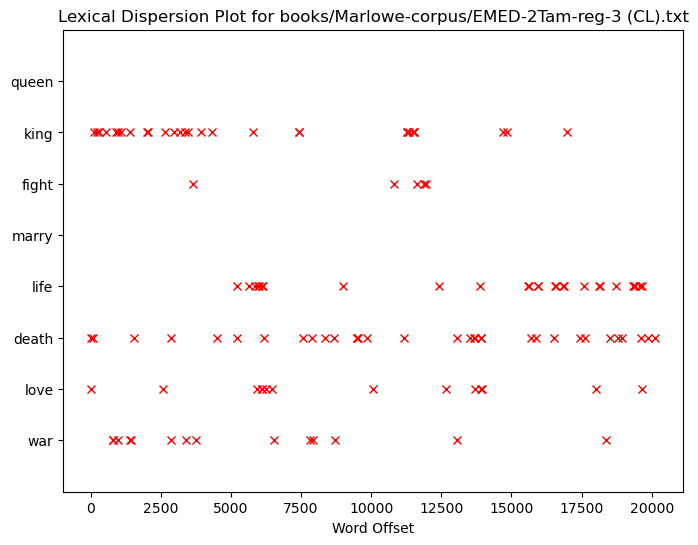

Lexical Dispersion Plot for books/Marlowe-corpus/EMED-1Tam-reg-3 (CL).txt


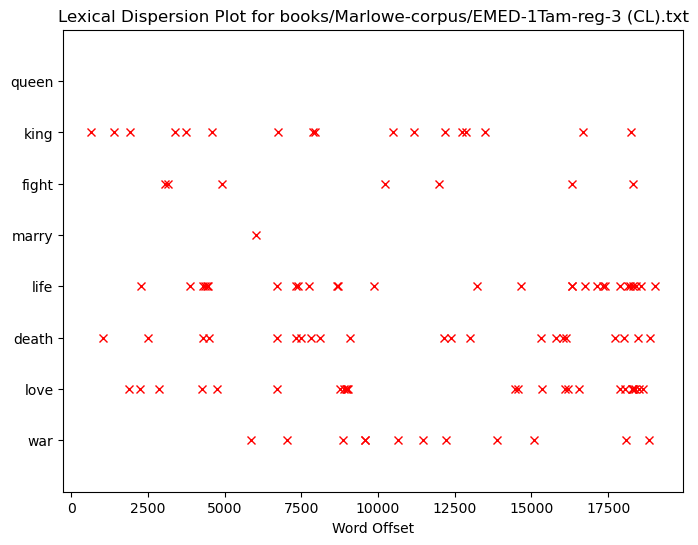

Lexical Dispersion Plot for books/Marlowe-corpus/2HVI-MIT (CL).txt


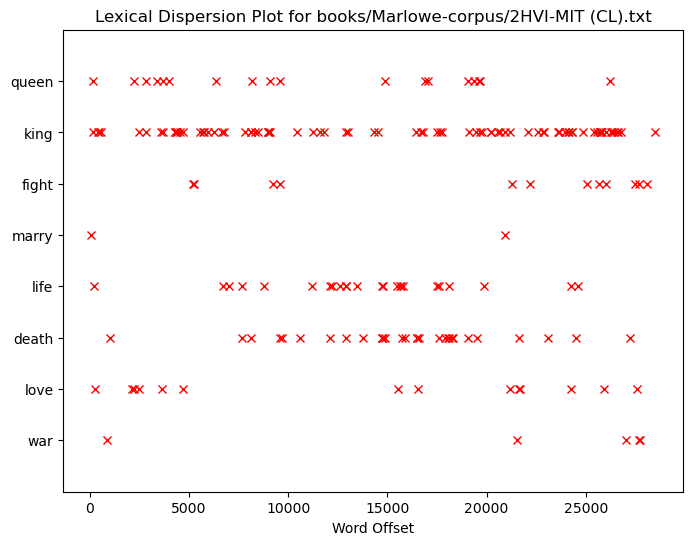

Lexical Dispersion Plot for books/Marlowe-corpus/EMED-Ed2-reg-3(CL).txt


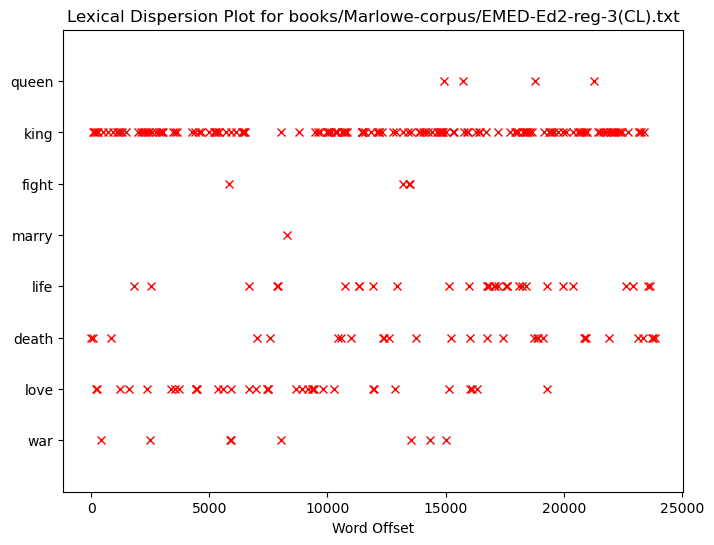

Lexical Dispersion Plot for books/Marlowe-corpus/EMED-MP-reg-3(CL).txt


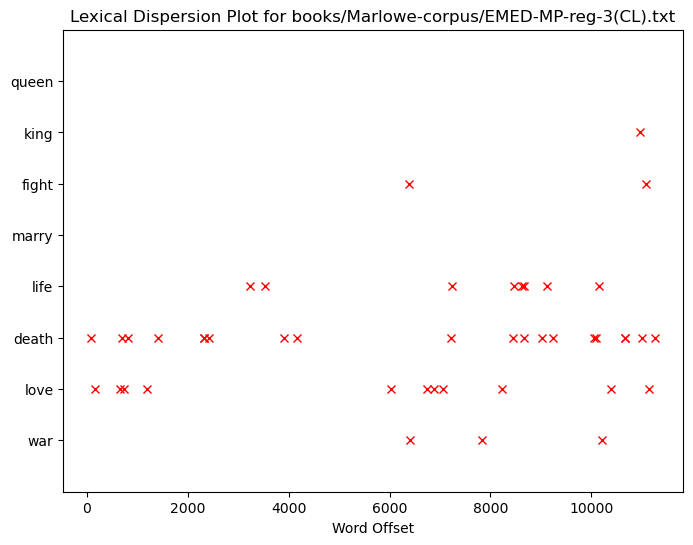

Lexical Dispersion Plot for books/Marlowe-corpus/EMED-Dido-reg-3 (CL).txt


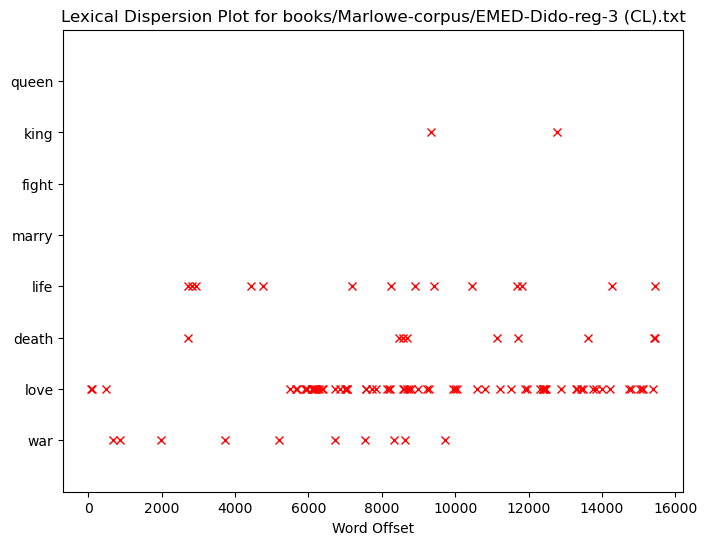

Lexical Dispersion Plot for books/Marlowe-corpus/1HVI-MIT (CL).txt


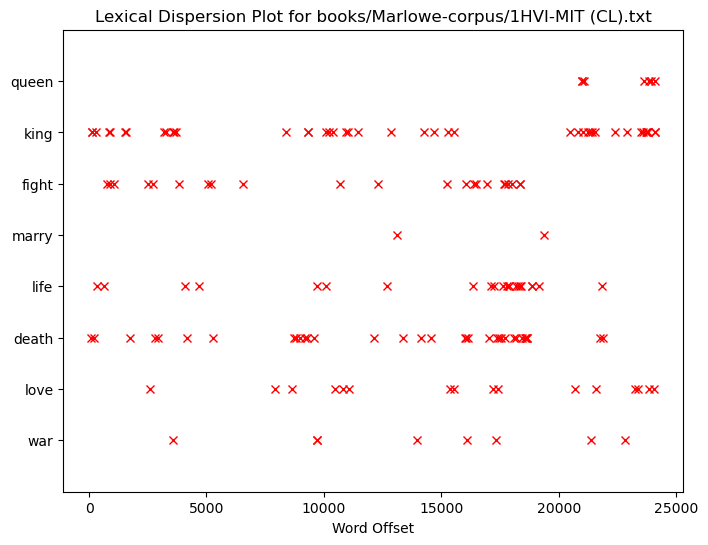

Lexical Dispersion Plot for books/Marlowe-corpus/EMED-JoM-reg-3 (CL).txt


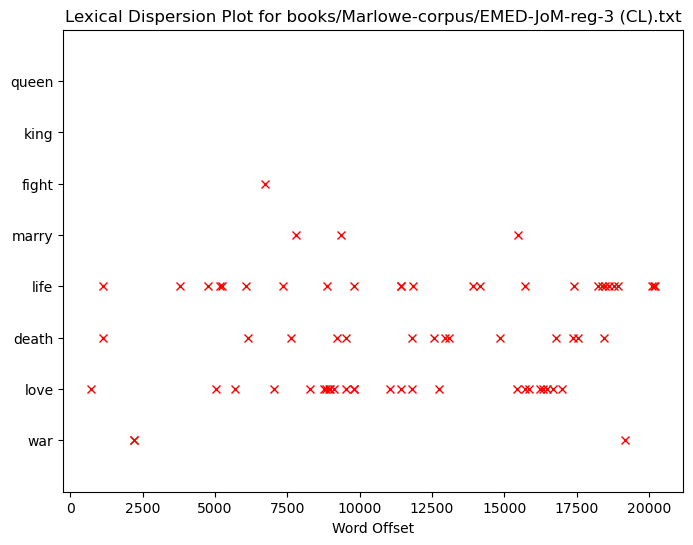

Lexical Dispersion Plot for books/Shakespeare-corpus/1H6: Henry VI, Part 1.txt


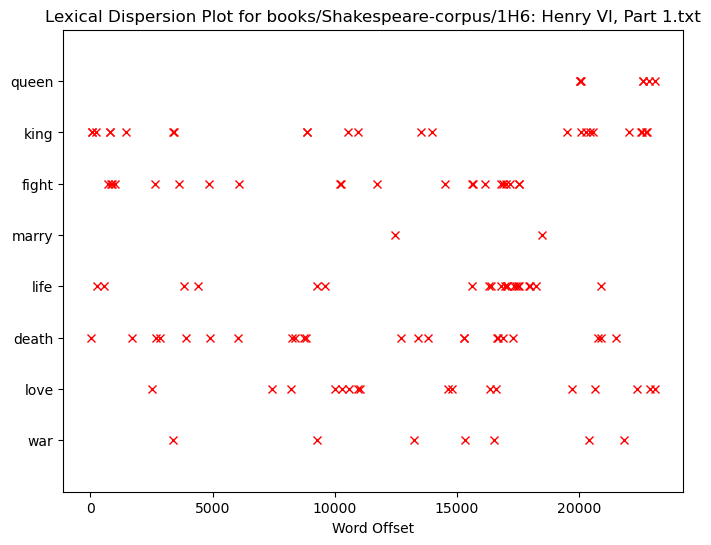

Lexical Dispersion Plot for books/Shakespeare-corpus/Ham: Hamlet.txt


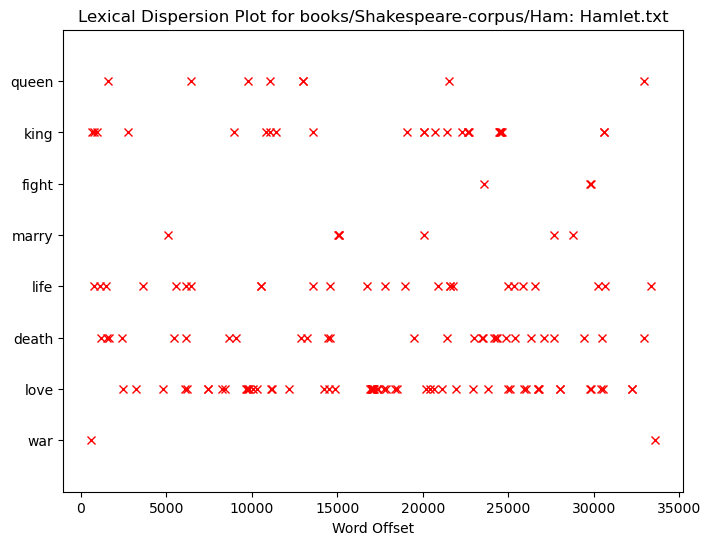

Lexical Dispersion Plot for books/Shakespeare-corpus/TNK: Two Noble Kinsmen.txt


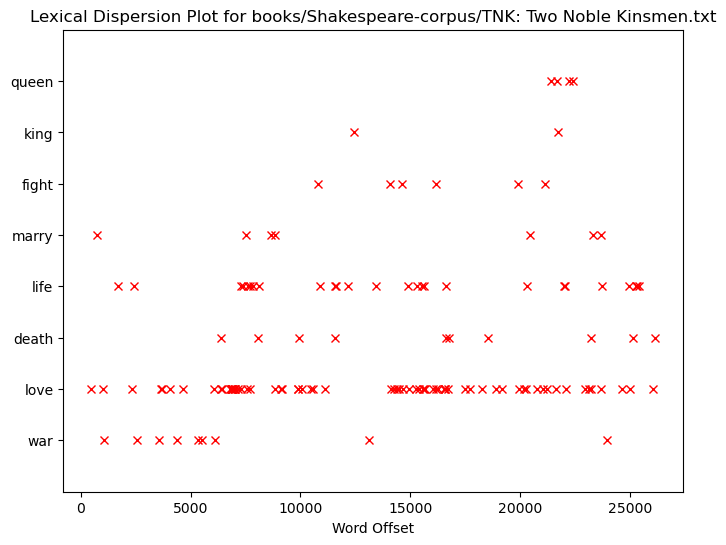

Lexical Dispersion Plot for books/Shakespeare-corpus/Tim: Timon of Athens.txt


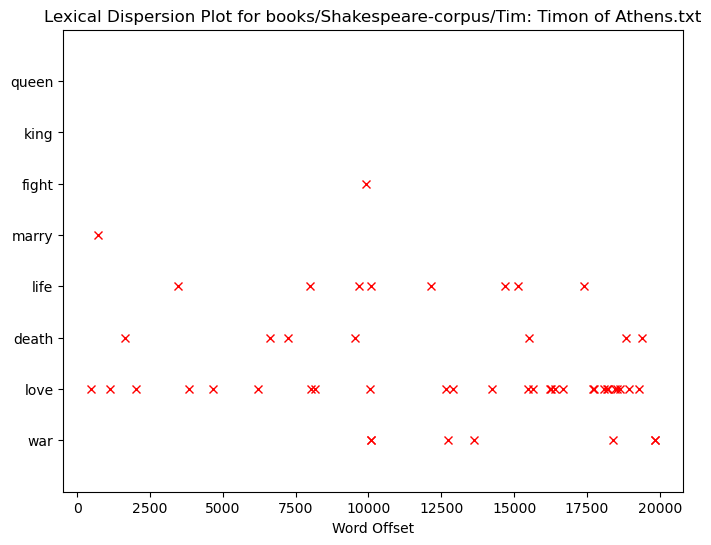

Lexical Dispersion Plot for books/Shakespeare-corpus/WT: The Winter's Tale.txt


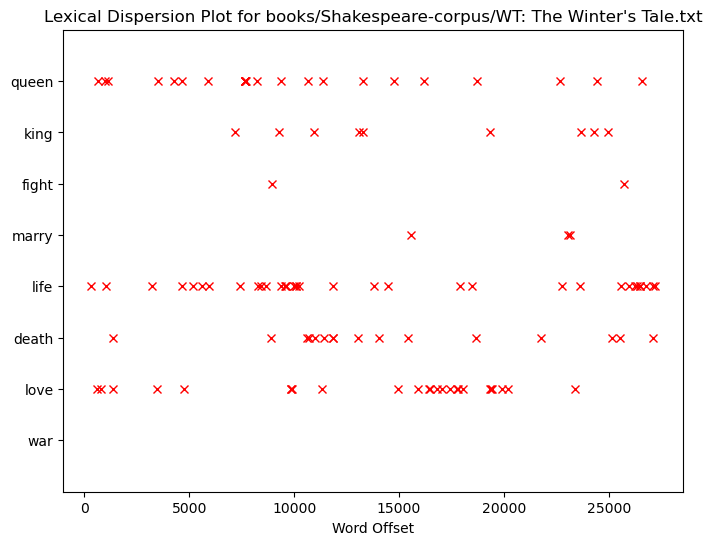

Lexical Dispersion Plot for books/Shakespeare-corpus/Wiv: The Merry Wives of Windsor.txt


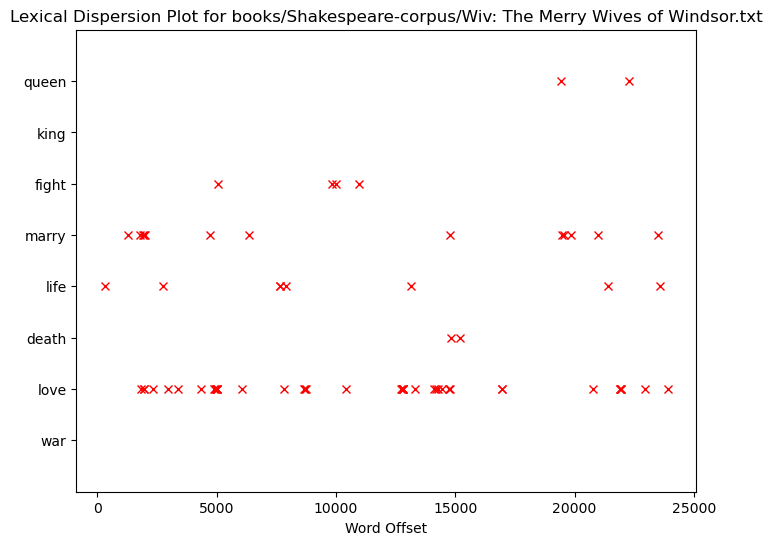

Lexical Dispersion Plot for books/Shakespeare-corpus/Jn: King John.txt


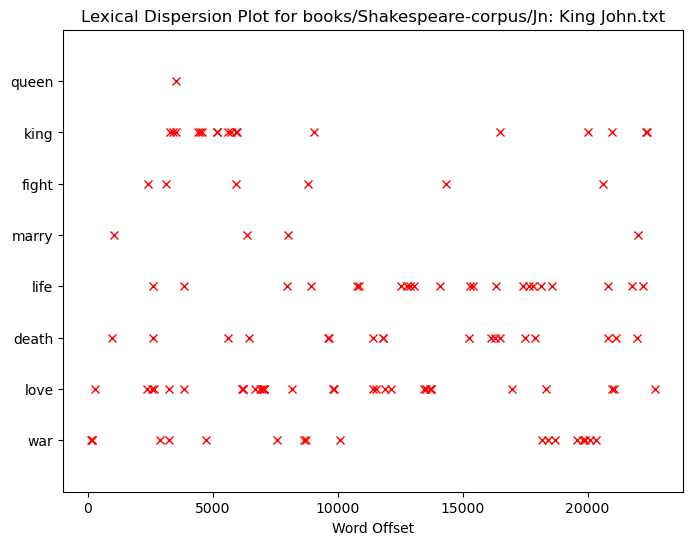

Lexical Dispersion Plot for books/Shakespeare-corpus/1H4: Henry IV, Part 1.txt


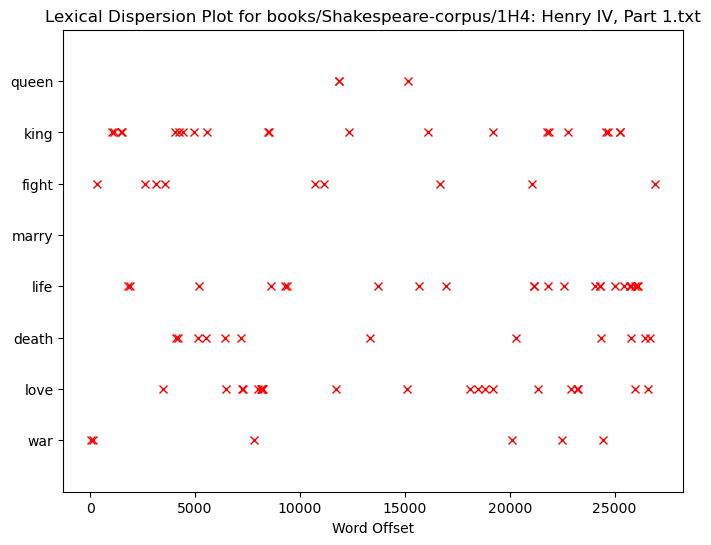

Lexical Dispersion Plot for books/Shakespeare-corpus/H8: Henry VIII.txt


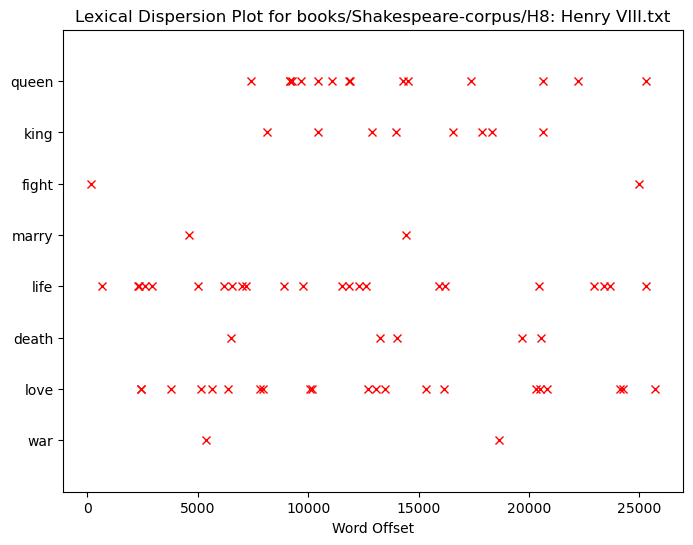

Lexical Dispersion Plot for books/Shakespeare-corpus/Tmp: The Tempest.txt


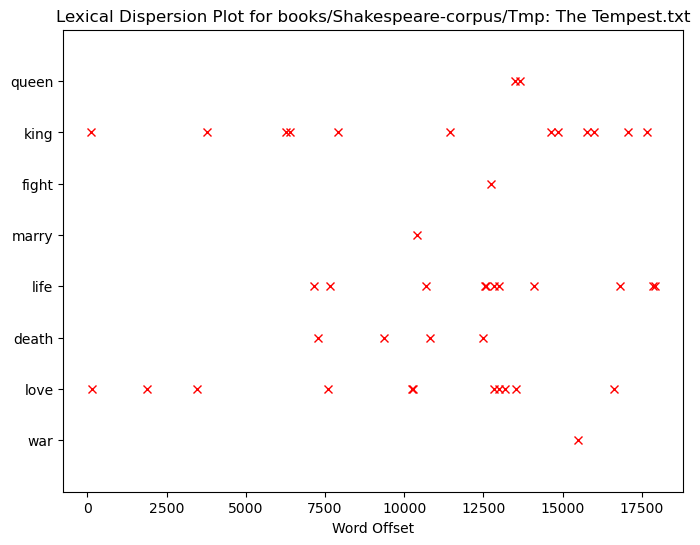

Lexical Dispersion Plot for books/Shakespeare-corpus/Ado: Much Ado About Nothing.txt


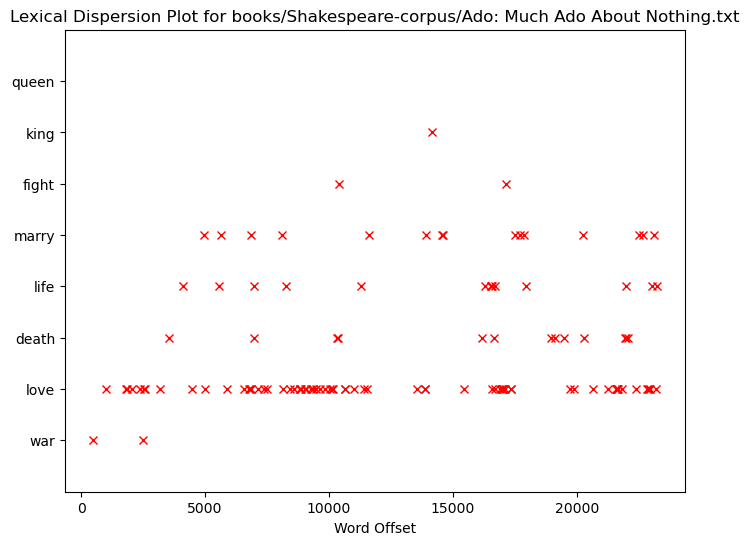

Lexical Dispersion Plot for books/Shakespeare-corpus/Rom: Romeo and Juliet.txt


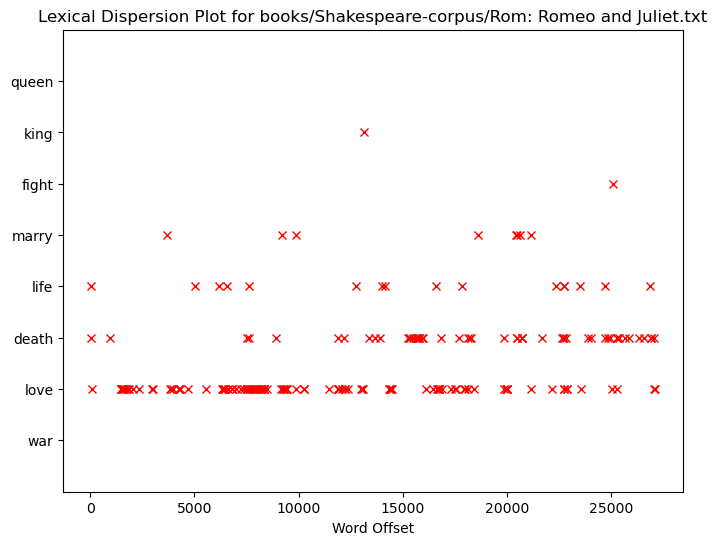

Lexical Dispersion Plot for books/Shakespeare-corpus/Tit: Titus Andronicus.txt


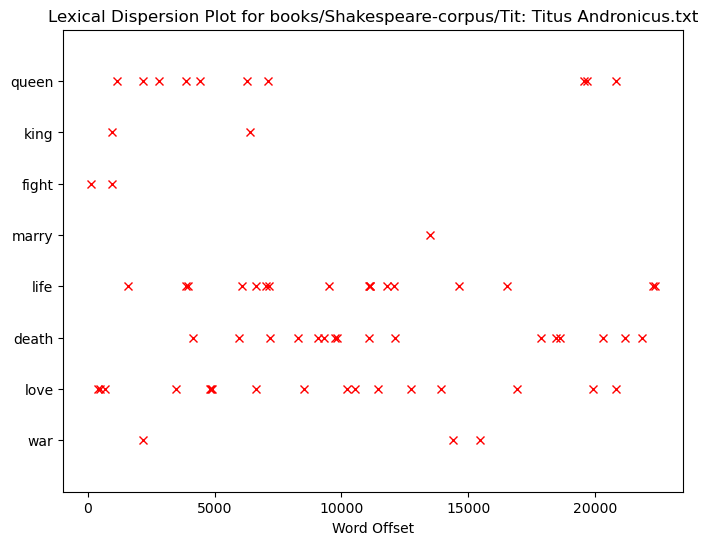

Lexical Dispersion Plot for books/Shakespeare-corpus/R2: Richard II.txt


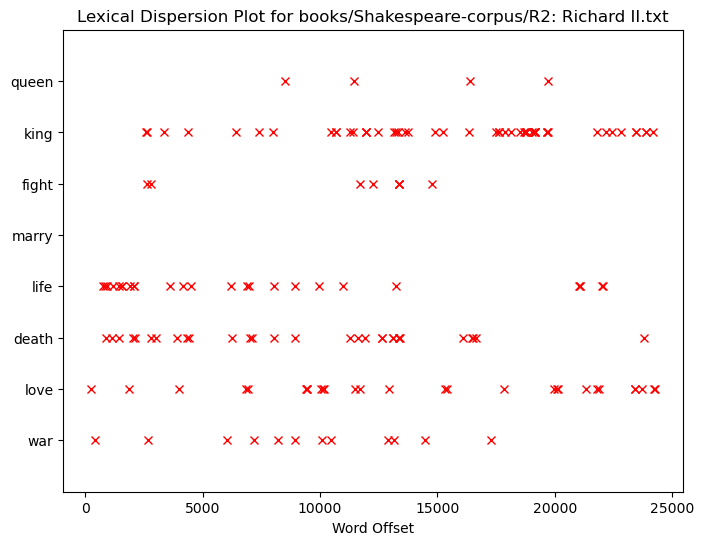

Lexical Dispersion Plot for books/Shakespeare-corpus/Mac: Macbeth.txt


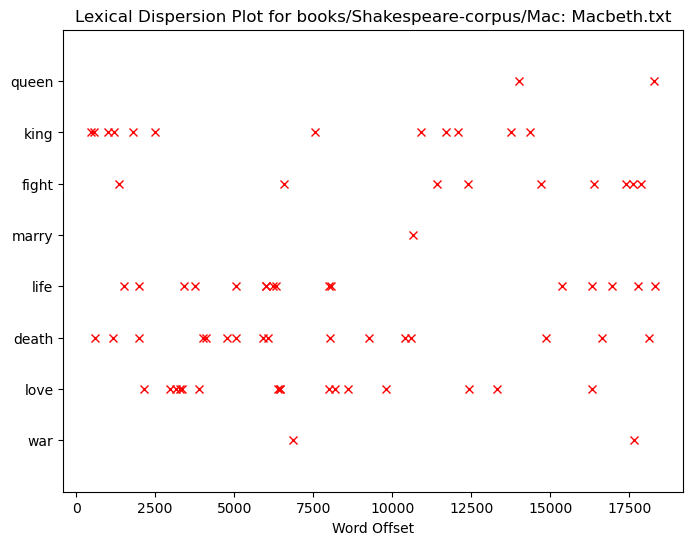

Lexical Dispersion Plot for books/Shakespeare-corpus/2H4: Henry IV, Part 2.txt


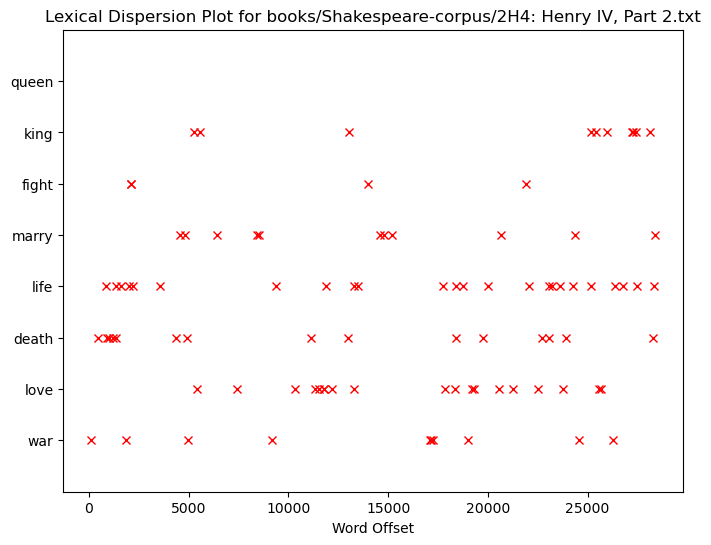

Lexical Dispersion Plot for books/Shakespeare-corpus/Err: The Comedy of Errors.txt


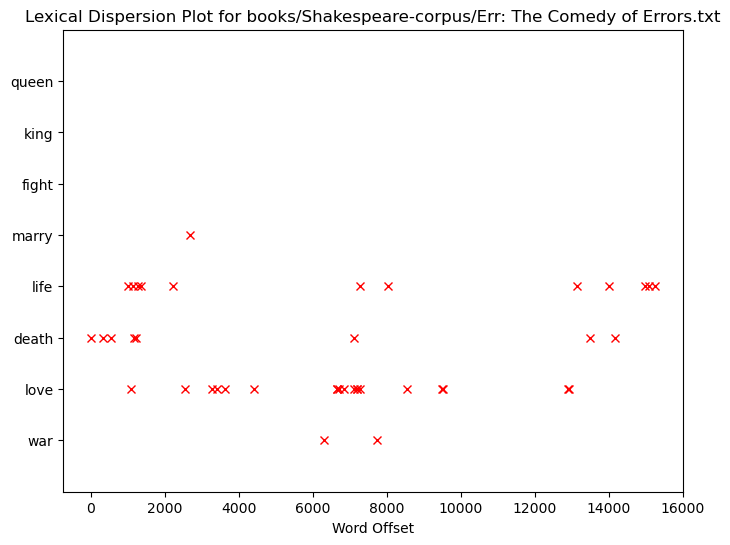

Lexical Dispersion Plot for books/Shakespeare-corpus/AWW: All's Well That Ends Well.txt


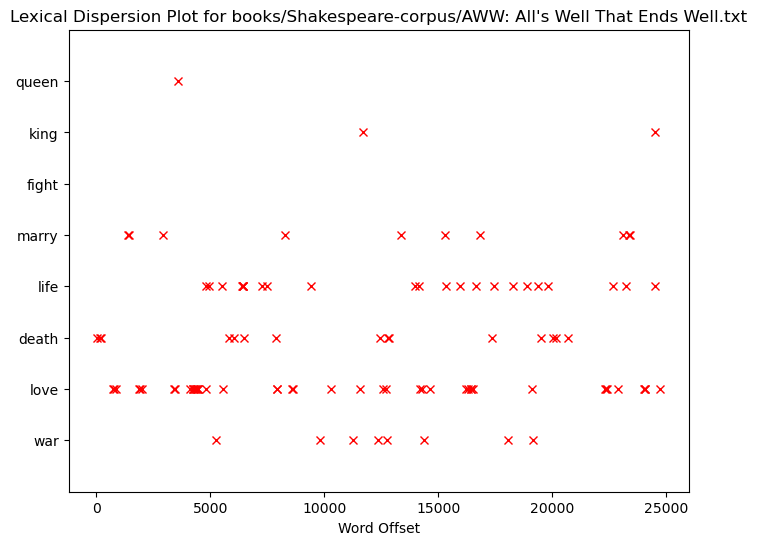

Lexical Dispersion Plot for books/Shakespeare-corpus/MV: The Merchant of Venice.txt


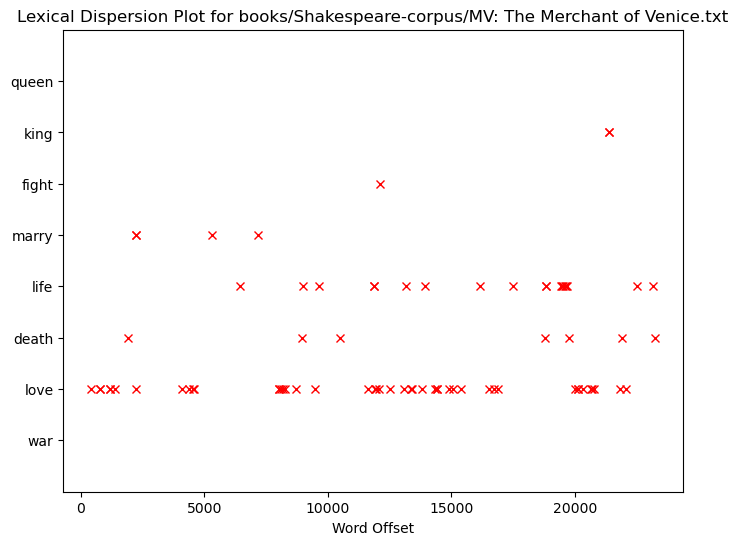

Lexical Dispersion Plot for books/Shakespeare-corpus/2H6: Henry VI, Part 2.txt


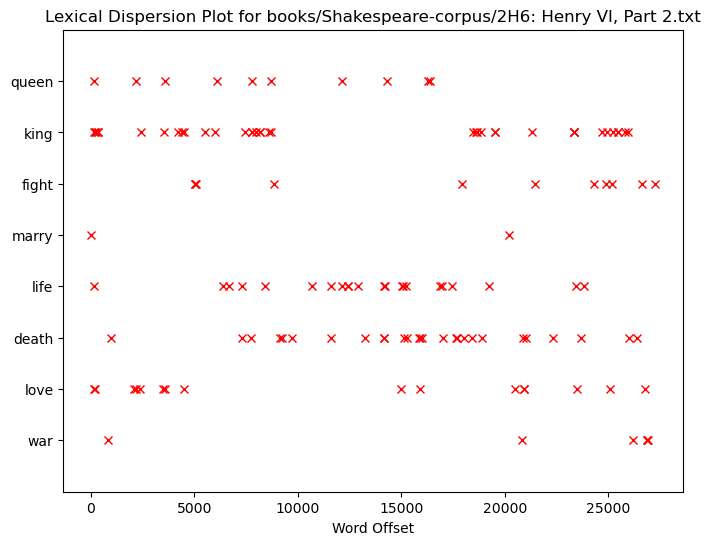

Lexical Dispersion Plot for books/Shakespeare-corpus/Cor: Coriolanus.txt


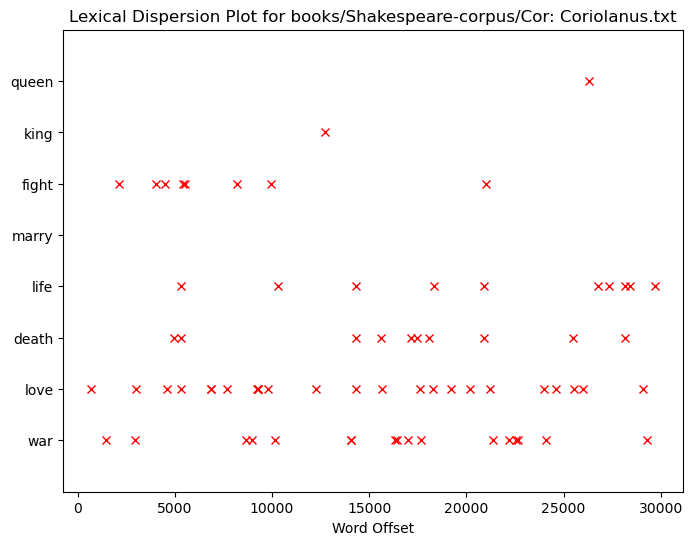

Lexical Dispersion Plot for books/Shakespeare-corpus/R3: Richard III.txt


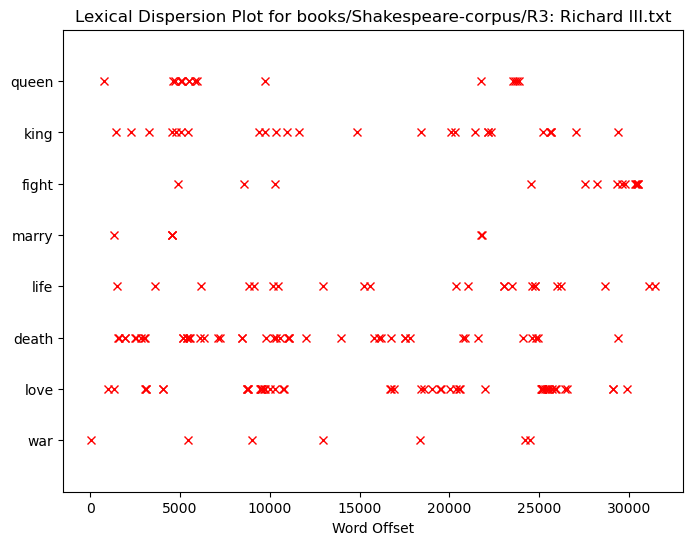

Lexical Dispersion Plot for books/Shakespeare-corpus/Lr: King Lear.txt


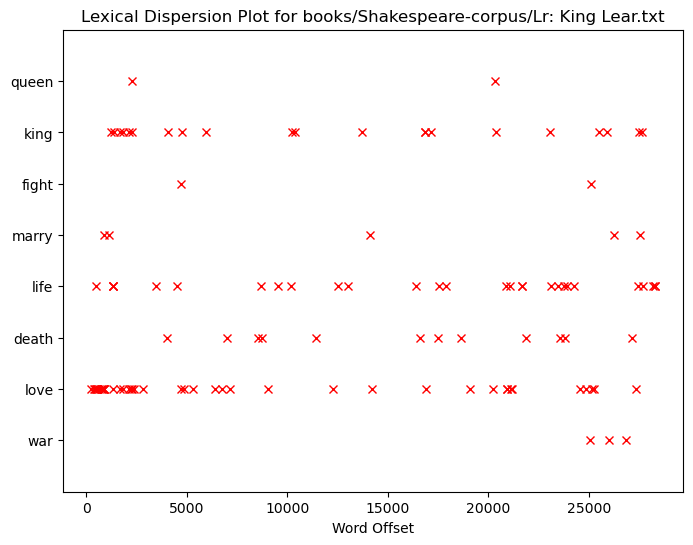

Lexical Dispersion Plot for books/Shakespeare-corpus/AYL: As You Like It.txt


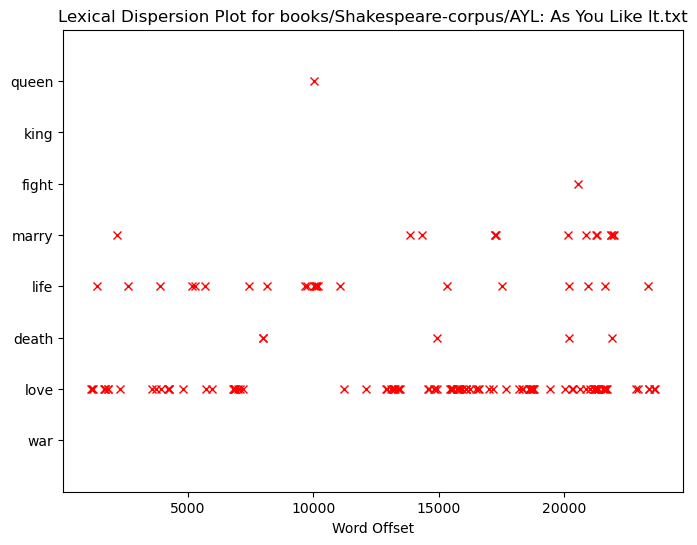

Lexical Dispersion Plot for books/Shakespeare-corpus/Per: Pericles.txt


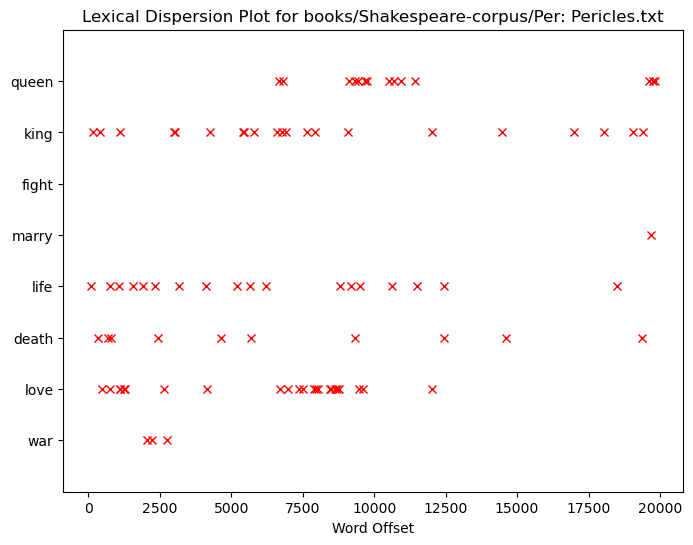

Lexical Dispersion Plot for books/Shakespeare-corpus/H5: Henry V.txt


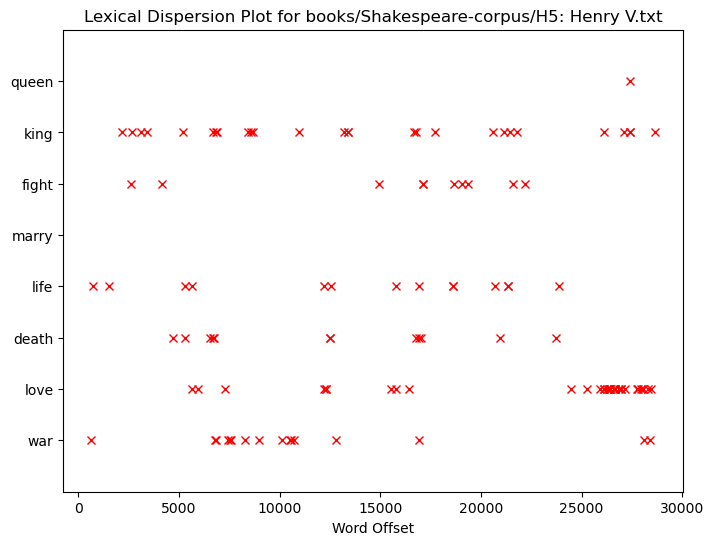

Lexical Dispersion Plot for books/Shakespeare-corpus/TGV: Two Gentlemen of Verona.txt


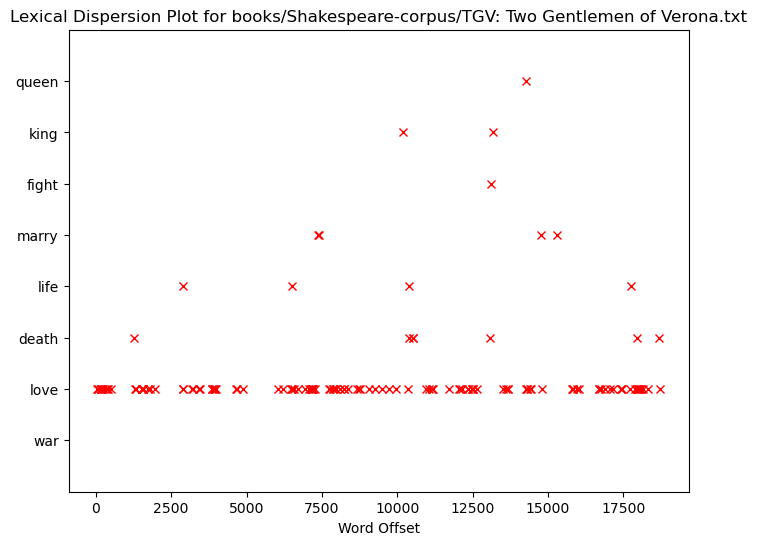

Lexical Dispersion Plot for books/Shakespeare-corpus/Cym: Cymbeline.txt


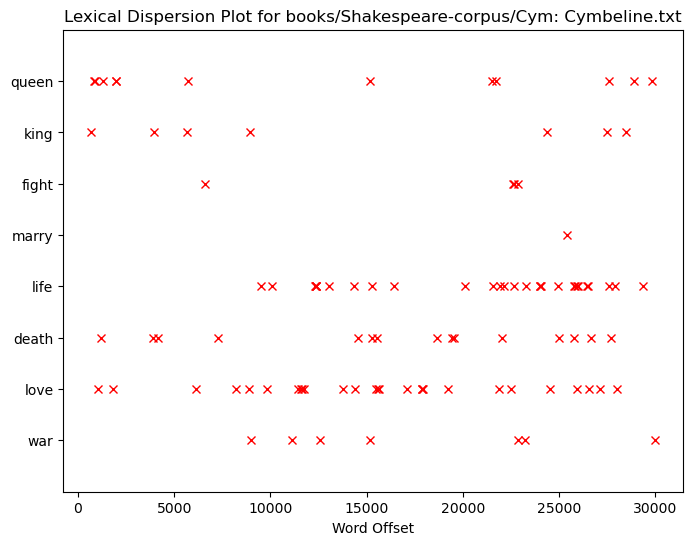

Lexical Dispersion Plot for books/Shakespeare-corpus/Tro: Troilus and Cressida.txt


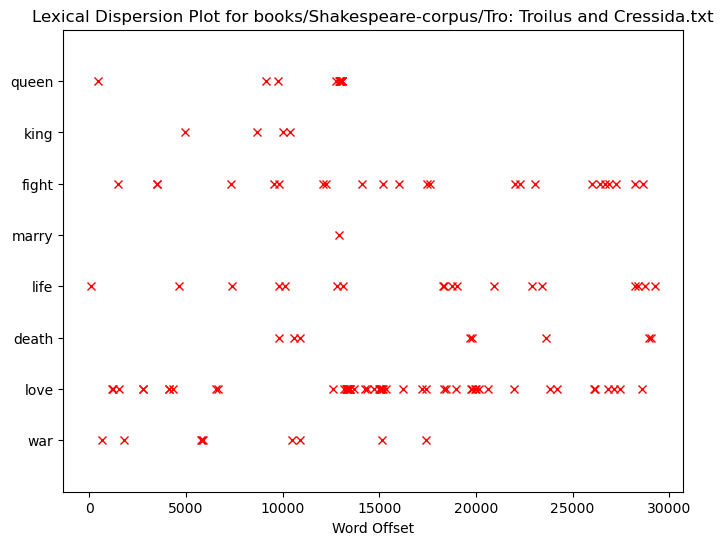

Lexical Dispersion Plot for books/Shakespeare-corpus/MM: Measure for Measure.txt


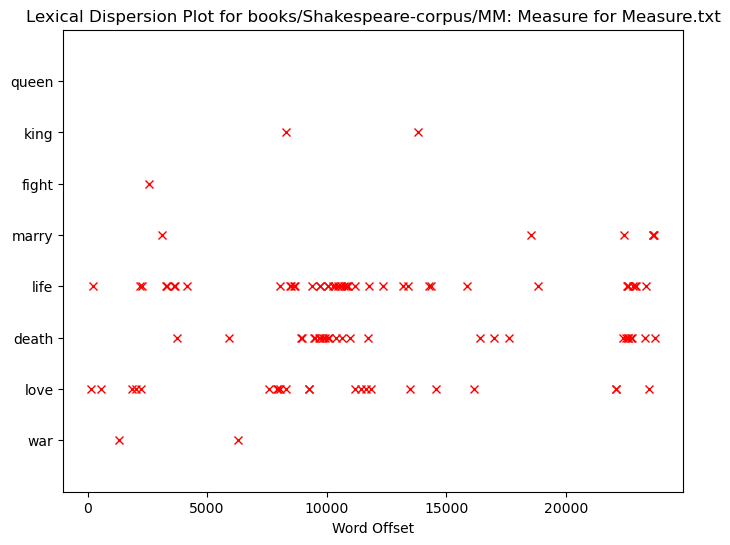

Lexical Dispersion Plot for books/Shakespeare-corpus/MND: A Midsummer Night's Dream.txt


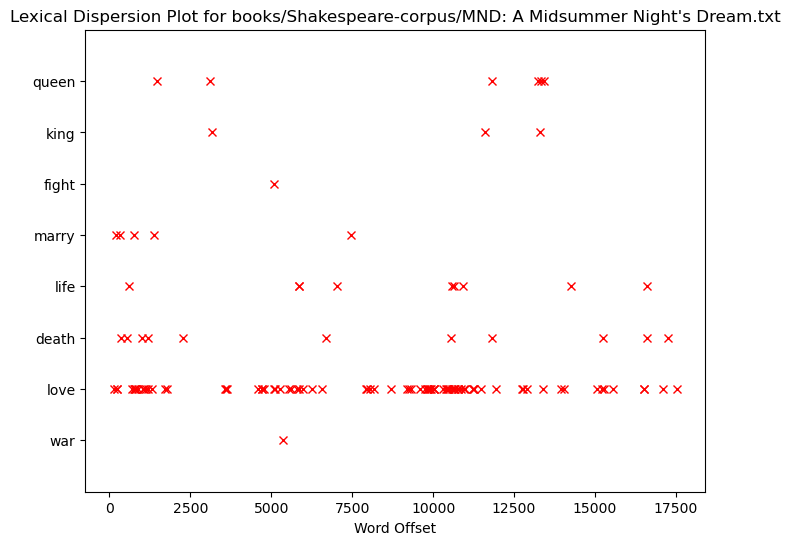

Lexical Dispersion Plot for books/Shakespeare-corpus/TN: Twelfth Night.txt


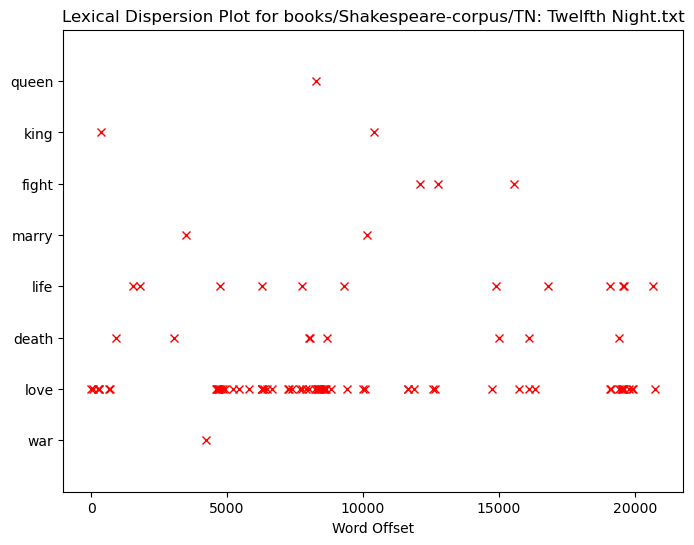

Lexical Dispersion Plot for books/Shakespeare-corpus/3H6: Henry VI, Part 3.txt


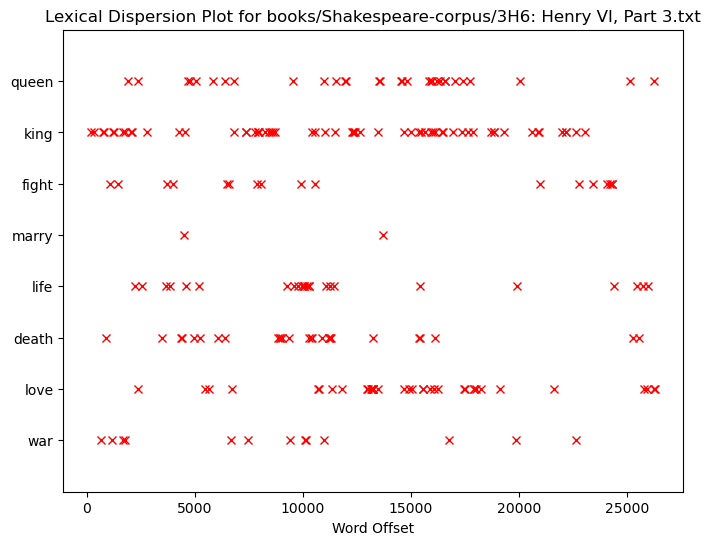

Lexical Dispersion Plot for books/Shakespeare-corpus/JC: Julius Caesar.txt


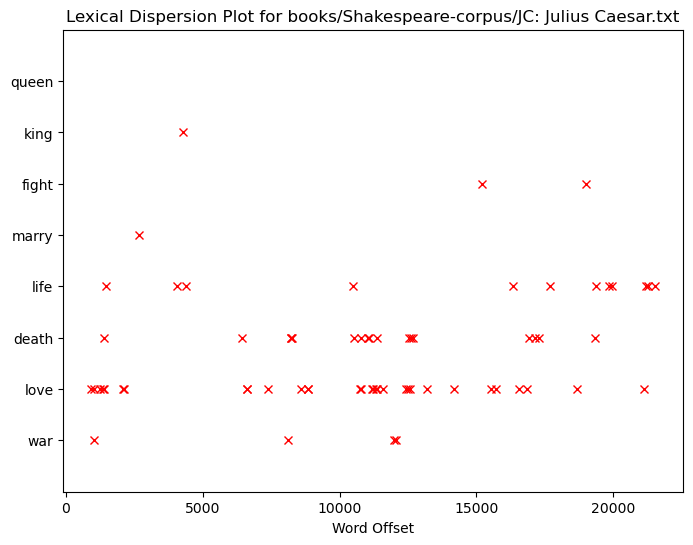

Lexical Dispersion Plot for books/Shakespeare-corpus/Oth: Othello.txt


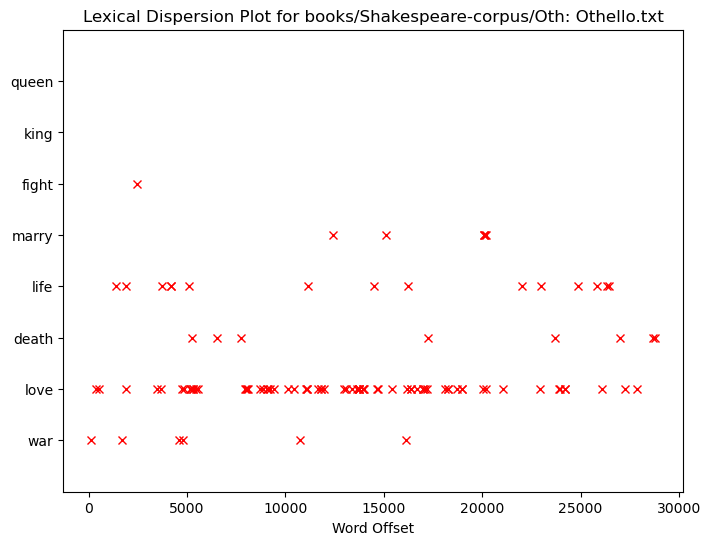

Lexical Dispersion Plot for books/Shakespeare-corpus/LLL: Love's Labor's Lost.txt


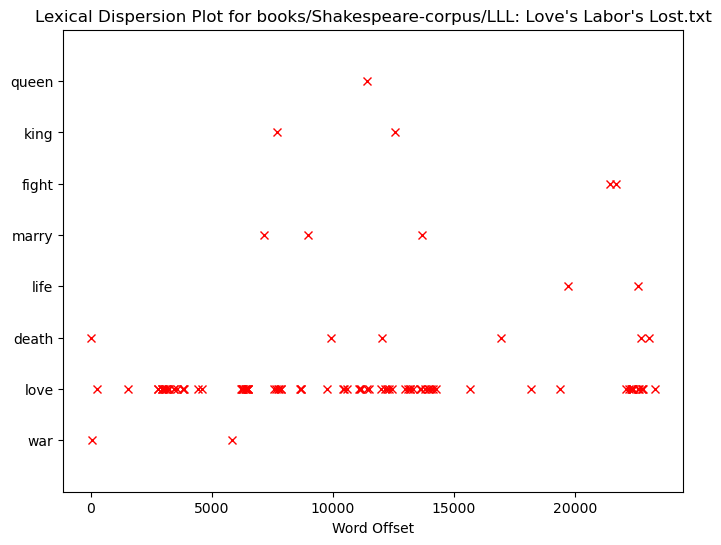

Lexical Dispersion Plot for books/Shakespeare-corpus/Shr: The Taming of the Shrew.txt


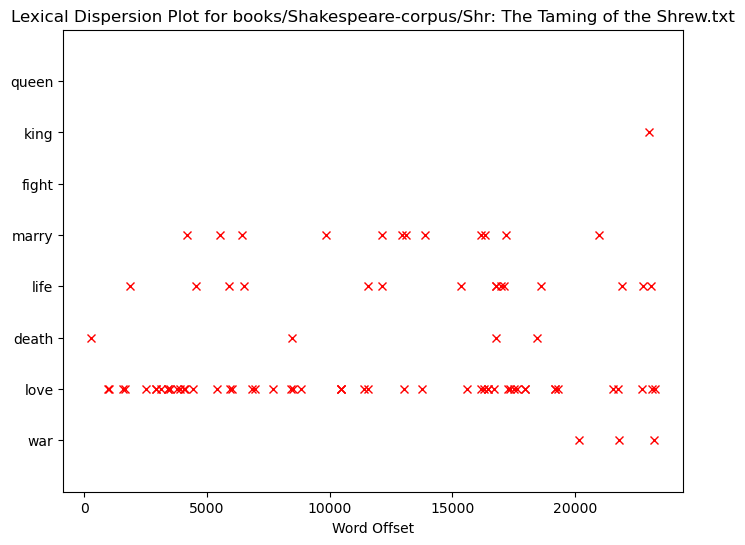

Lexical Dispersion Plot for books/Shakespeare-corpus/Ant: Antony and Cleopatra.txt


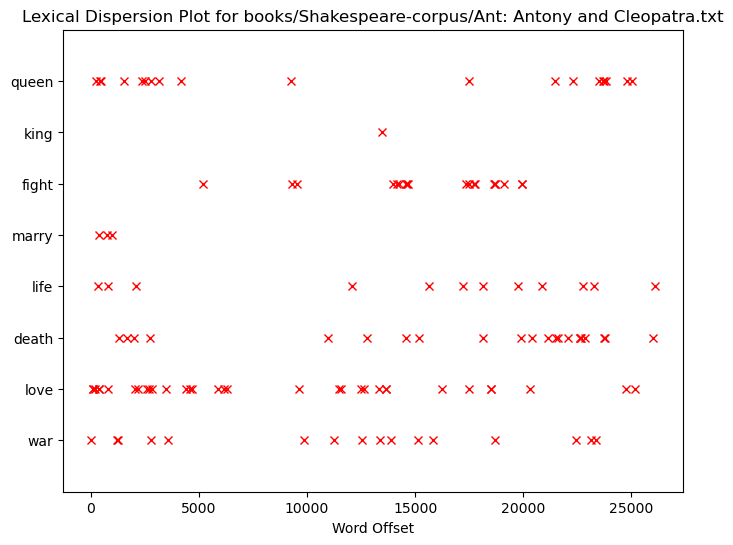

In [3]:
for file_path in glob.glob("books/**/*.txt", recursive=True):
    with open(file_path, "r") as file:
        text = file.read()

    # Custom Tokenizer
    # Start of Go-To Tokenizer for English - Modified TreebankWordTokenize
    tokens = TreebankWordTokenizer().tokenize(text)
    for word in tokens:
        word = word.lower().strip(punctuation)
    tokens = list(filter(None, tokens))  
    ## EOF Function

    points = [(x, y) for x in range(len(tokens))
        for y in range(len(words)) if tokens[x] == words[y]]

    if points:
        x, y = zip(*points)
    else:
        x = y = ()
    
    print(f"Lexical Dispersion Plot for {file_path}")

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, "rx")
    plt.yticks(range(len(words)), words)
    plt.ylim(-1, len(words))
    plt.title(f"Lexical Dispersion Plot for {file_path}")
    plt.xlabel("Word Offset")
    plt.show()